In [9]:
import pandas as pd
data = pd.read_csv("breast_cancer_survival.csv")
print(data.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [8]:
print(data.dtypes)

Age                     int64
Gender                 object
Protein1                int64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object


Accuracy for Age prediction: 0.029850746268656716
Accuracy for Protein prediction: 0.0


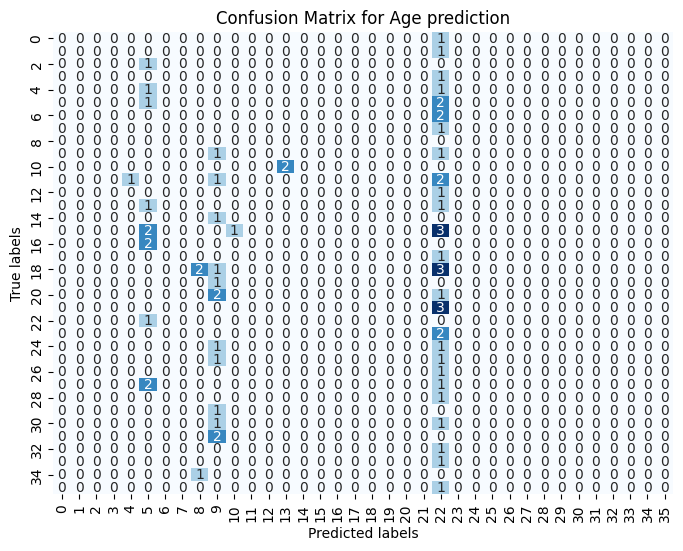

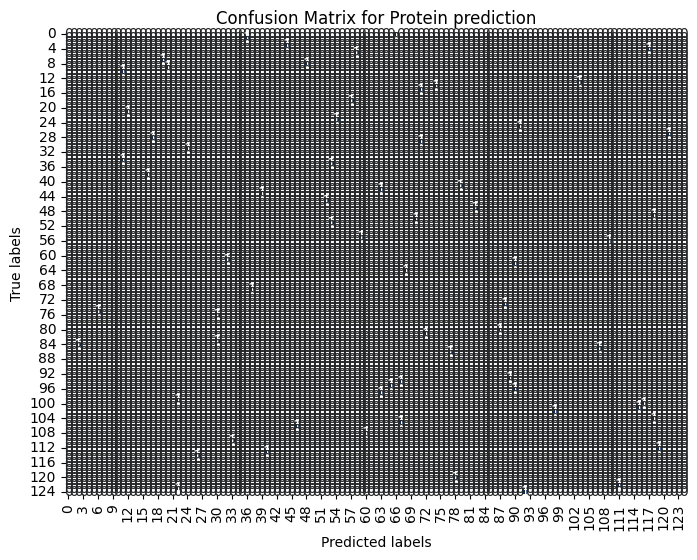

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv("breast_cancer_survival.csv")

# Convert non-numeric data to numeric
label_encoder = LabelEncoder()
data["Age"] = label_encoder.fit_transform(data["Age"])
data["Protein1"] = label_encoder.fit_transform(data["Protein1"])

# Drop non-numeric columns if needed
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Set features and target variables
features = data_numeric.drop(["Age", "Protein1"], axis=1)  # Drop the target variable columns
target_age = data_numeric["Age"]
target_protein = data_numeric["Protein1"]

# Split data for age prediction
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features, target_age, test_size=0.2, random_state=42)

# Split data for protein prediction
X_train_protein, X_test_protein, y_train_protein, y_test_protein = train_test_split(features, target_protein, test_size=0.2, random_state=42)

# Initialize SVM classifiers for age and protein prediction
svm_classifier_age = SVC()
svm_classifier_protein = SVC()

# Train the classifiers for age and protein prediction
svm_classifier_age.fit(X_train_age, y_train_age)
svm_classifier_protein.fit(X_train_protein, y_train_protein)

# Predict on test set for age and protein prediction
y_pred_age = svm_classifier_age.predict(X_test_age)
y_pred_protein = svm_classifier_protein.predict(X_test_protein)

# Calculate accuracy for age and protein prediction
accuracy_age = accuracy_score(y_test_age, y_pred_age)
accuracy_protein = accuracy_score(y_test_protein, y_pred_protein)

print("Accuracy for Age prediction:", accuracy_age)
print("Accuracy for Protein prediction:", accuracy_protein)

# Plot confusion matrix for age prediction
cm_age = confusion_matrix(y_test_age, y_pred_age)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_age, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Age prediction")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Plot confusion matrix for protein prediction
cm_protein = confusion_matrix(y_test_protein, y_pred_protein)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_protein, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Protein prediction")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()